<a href="https://colab.research.google.com/github/ProkhorKondratev/KondratevPV_Neural/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа №2. Задание 2.

1.1 Загрузка данных

In [58]:
import cv2
import os
import numpy as np

data_path = '/content/drive/MyDrive/Neural_class_data'
class_dirs = []

data = []
labels = []

for file in os.listdir(data_path):
  class_dirs.append(os.path.join(data_path,file))

for class_dir in class_dirs:
  for image in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image)
    image_label = image_path.split(os.path.sep)[-2]
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
    labels.append(image_label)

print(f'Загружено {len(data)} изображений и {len(labels)} меток')

Загружено 3000 изображений и 3000 меток


1.2 Нормализация данных

In [59]:
from keras.utils import to_categorical
data = np.array(data, dtype="float") / 255.0
label_to_int = {"lions": 0, "zebra": 1, "elephant": 2}
int_labels = [label_to_int[label] for label in labels]

class_labels = to_categorical(int_labels)

1.3 Разбивка на обучающую выборку и выборку валидации

In [60]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(data, class_labels, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)

1.4 Создание архитектуры нейронной сети

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

model = Sequential()

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

1.5 Компиляция нейронной сети

In [62]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
print(f'Используемый оптимизатор: {model.optimizer.name}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)              

1.6 Обучение нейронной сети

In [63]:
history = model.fit(X_train, y_train, epochs=80, batch_size=1000, validation_data=(X_valid, y_valid), verbose=True)

Epoch 1/80
2/2 [==============================] - 2s 632ms/step - loss: 1.8938 - accuracy: 0.3297 - val_loss: 1.9221 - val_accuracy: 0.3646
Epoch 2/80
2/2 [==============================] - 1s 372ms/step - loss: 1.9200 - accuracy: 0.3219 - val_loss: 1.4212 - val_accuracy: 0.2958
Epoch 3/80
2/2 [==============================] - 1s 361ms/step - loss: 1.3412 - accuracy: 0.3589 - val_loss: 1.1238 - val_accuracy: 0.3646
Epoch 4/80
2/2 [==============================] - 1s 385ms/step - loss: 1.2484 - accuracy: 0.3313 - val_loss: 1.0898 - val_accuracy: 0.3479
Epoch 5/80
2/2 [==============================] - 1s 446ms/step - loss: 1.1961 - accuracy: 0.3547 - val_loss: 1.1372 - val_accuracy: 0.2958
Epoch 6/80
2/2 [==============================] - 1s 374ms/step - loss: 1.1762 - accuracy: 0.3615 - val_loss: 1.0769 - val_accuracy: 0.4708
Epoch 7/80
2/2 [==============================] - 1s 374ms/step - loss: 1.1252 - accuracy: 0.3635 - val_loss: 1.0745 - val_accuracy: 0.4604
Epoch 8/80
2/2 [====

1.7 Оценка критерия качества работы нейронной сети с помощью представления на графике

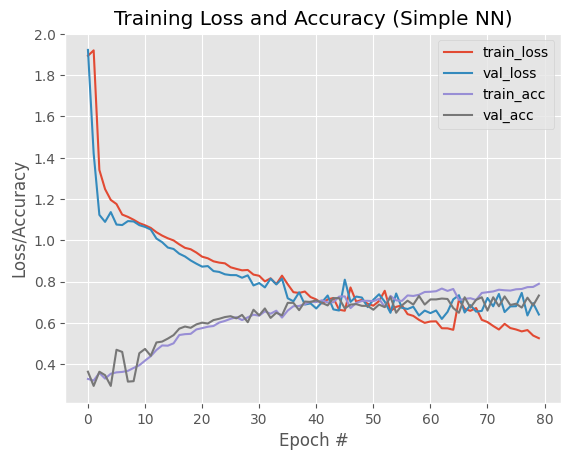

In [64]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.grid(True)
plt.show()

1.8 Оценка критерия качества работы нейронной сети на тестовой выборке

In [65]:
neural_loss = model.evaluate(X_test, y_test)
neural_loss

19/19 [==============================] - 0s 10ms/step - loss: 0.7372 - accuracy: 0.7183


[0.7372206449508667, 0.7183333039283752]

1.9 Предсказание на тестовых данных

In [67]:
X_new = X_test[:10]
Y_new = y_test[:10]
y_pred = model.predict(X_new)

class_dict = {
    0: "lion",
    1: "zebra",
    2: "elephant"
}

for i in range(len(y_pred)):
  neural_res = y_pred[i].argmax()
  real_res = Y_new[i].argmax()
  print(f'Определено: {neural_res} ({class_dict[neural_res]})  Правильное: {real_res} ({class_dict[real_res]})')

1/1 [==============================] - 0s 26ms/step
Определено: 1 (zebra)  Правильное: 1 (zebra)
Определено: 1 (zebra)  Правильное: 1 (zebra)
Определено: 1 (zebra)  Правильное: 1 (zebra)
Определено: 0 (lion)  Правильное: 0 (lion)
Определено: 2 (elephant)  Правильное: 2 (elephant)
Определено: 0 (lion)  Правильное: 1 (zebra)
Определено: 1 (zebra)  Правильное: 1 (zebra)
Определено: 2 (elephant)  Правильное: 2 (elephant)
Определено: 2 (elephant)  Правильное: 0 (lion)
Определено: 1 (zebra)  Правильное: 2 (elephant)


2.0 Сохранение обученной модели и меток классов на диск

In [69]:
import pickle

try:
  model.save('model.h5', save_format='h5')
  with open('label_bin', 'wb') as f:
    pickle.dump(class_dict, f)
  
  print('Успешное сохранение')

except Exception as error:
  print(error)

Успешное сохранение


2.1 Проверка обученной модели пользовательскими данными

Saving lev_01.jpg to lev_01.jpg


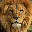

In [70]:
from google.colab import files
from google.colab.patches import cv2_imshow
uploaded = files.upload()

if uploaded:
  image = cv2.imread(list(uploaded.keys())[0])
  output = image.copy()
  image = cv2.resize(image, (32, 32))
  cv2_imshow(image)

In [71]:
image = image.flatten()
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

image

array([[0.22745098, 0.28627451, 0.29803922, ..., 0.08235294, 0.37254902,
        0.29019608]])

1/1 [==============================] - 0s 82ms/step


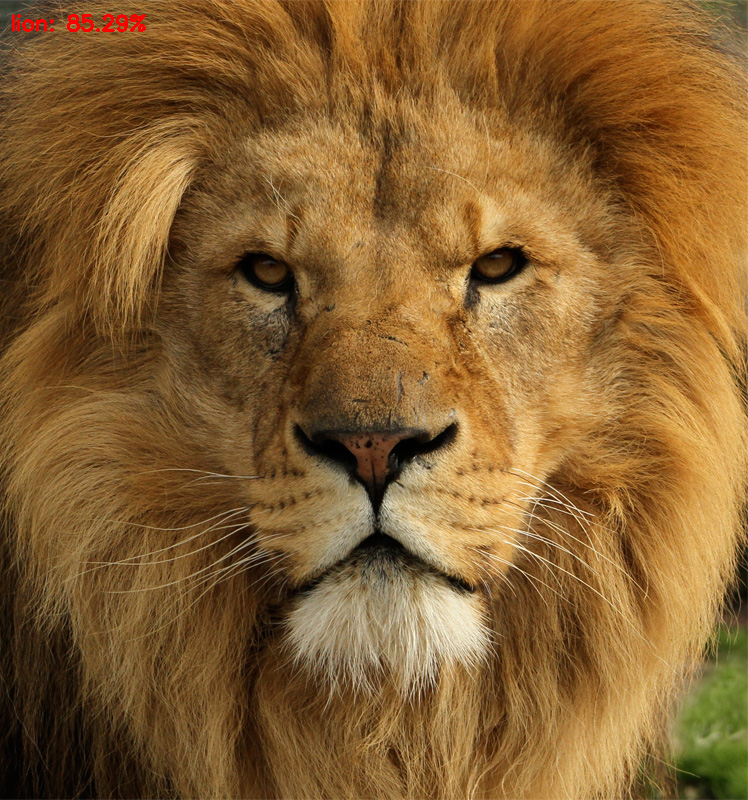

In [72]:
from keras import models

model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

user_predict = model.predict(image)
user_pred_index = user_predict[0].argmax()

text = "{}: {:.2f}%".format(lb[user_pred_index], user_predict[0][user_pred_index] * 100)

cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)
cv2_imshow(output)